In [ ]:
!pip install --upgrade category_encoders
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso, Ridge
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.ensemble import RandomForestRegressor
from category_encoders import TargetEncoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 4.9 MB/s eta 0:00:00


**DATA EXPLORATION**

In [ ]:
df = pd.read_csv('diamondsdataset.csv')
df.head(200)

,id,url,shape,price,carat,cut,color,clarity,report,type,date_fetched
0,10086429,https://www.brilliantearth.com//loose-diamonds...,Round,400,0.30,Very Good,J,SI2,GIA,natural,2020-11-29 12-26 PM
1,10016334,https://www.brilliantearth.com//loose-diamonds...,Emerald,400,0.31,Ideal,I,SI1,GIA,natural,2020-11-29 12-26 PM
2,9947216,https://www.brilliantearth.com//loose-diamonds...,Emerald,400,0.30,Ideal,I,VS2,GIA,natural,2020-11-29 12-26 PM
3,10083437,https://www.brilliantearth.com//loose-diamonds...,Round,400,0.30,Ideal,I,SI2,GIA,natural,2020-11-29 12-26 PM
4,9946136,https://www.brilliantearth.com//loose-diamonds...,Emerald,400,0.30,Ideal,I,SI1,GIA,natural,2020-11-29 12-26 PM
...,...,...,...,...,...,...,...,...,...,...,...
195,9981984,https://www.brilliantearth.com//loose-diamonds...,Round,460,0.30,Ideal,J,SI1,GIA,natural,2020-11-29 12-26 PM
196,10028167,https://www.brilliantearth.com//loose-diamonds...,Emerald,460,0.30,Ideal,D,SI2,GIA,natural,2020-11-29 12-26 PM
197,9926638,https://www.brilliantearth.com//loose-diamonds...,Marquise,460,0.30,Very Good,I,VVS1,GIA,natural,2020-11-29 12-26 PM
198,10063014,https://www.brilliantearth.com//loose-diamonds...,Round,460,0.30,Very Good,J,VS2,GIA,natural,2020-11-29 12-26 PM


In [ ]:
#check missing value
print(df.isna().sum())

id              0
url             0
shape           0
price           0
carat           0
cut             0
color           0
clarity         0
report          0
type            0
date_fetched    0
dtype: int64


In [ ]:
#categorical
cat_features = df.select_dtypes(exclude=["number"])
cat_features

,url,shape,cut,color,clarity,report,type,date_fetched
0,https://www.brilliantearth.com//loose-diamonds...,Round,Very Good,J,SI2,GIA,natural,2020-11-29 12-26 PM
1,https://www.brilliantearth.com//loose-diamonds...,Emerald,Ideal,I,SI1,GIA,natural,2020-11-29 12-26 PM
2,https://www.brilliantearth.com//loose-diamonds...,Emerald,Ideal,I,VS2,GIA,natural,2020-11-29 12-26 PM
3,https://www.brilliantearth.com//loose-diamonds...,Round,Ideal,I,SI2,GIA,natural,2020-11-29 12-26 PM
4,https://www.brilliantearth.com//loose-diamonds...,Emerald,Ideal,I,SI1,GIA,natural,2020-11-29 12-26 PM
...,...,...,...,...,...,...,...,...
119302,https://www.brilliantearth.com//lab-diamonds-s...,Round,Super Ideal,D,VVS2,GCAL,lab,2020-11-29 12-26 PM
119303,https://www.brilliantearth.com//lab-diamonds-s...,Cushion,Very Good,G,SI2,IGI,lab,2020-11-29 12-26 PM
119304,https://www.brilliantearth.com//lab-diamonds-s...,Cushion,Ideal,D,SI2,IGI,lab,2020-11-29 12-26 PM
119305,https://www.brilliantearth.com//lab-diamonds-s...,Oval,Fair,D,VS2,IGI,lab,2020-11-29 12-26 PM


In [ ]:
#numerical
num_features = df.select_dtypes(include=["number"])
num_features

,id,price,carat
0,10086429,400,0.30
1,10016334,400,0.31
2,9947216,400,0.30
3,10083437,400,0.30
4,9946136,400,0.30
...,...,...,...
119302,10081678,99040,5.71
119303,9521564,107330,15.32
119304,9896730,110110,10.05
119305,9756570,126030,10.33


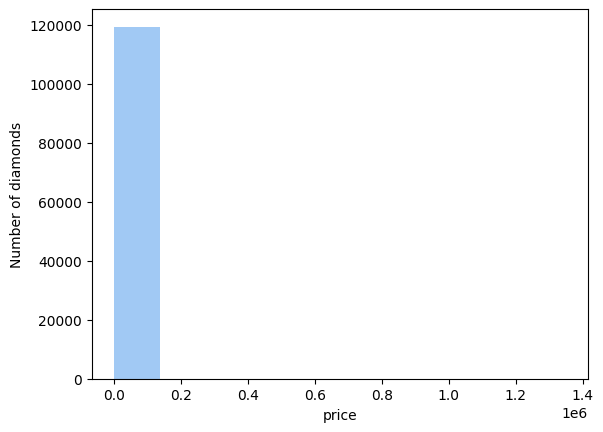

In [ ]:
#price distribution
price=df['price']
plt.hist(price)
plt.xlabel("price")
plt.ylabel("Number of diamonds") 
plt.show() 

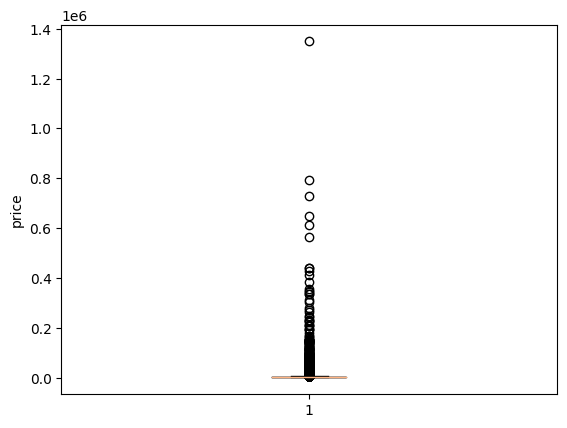

In [ ]:
plt.boxplot(price)
plt.ylabel("price")
# show plot
plt.show()

In [ ]:
price_quartile = np.quantile(price, [0,0.25,0.5,0.75,1])
print(price_quartile)

[2.70000e+02 9.00000e+02 1.77000e+03 3.49000e+03 1.34872e+06]


In [ ]:
majority_price = [x for x in price if x <3.49000e+03]

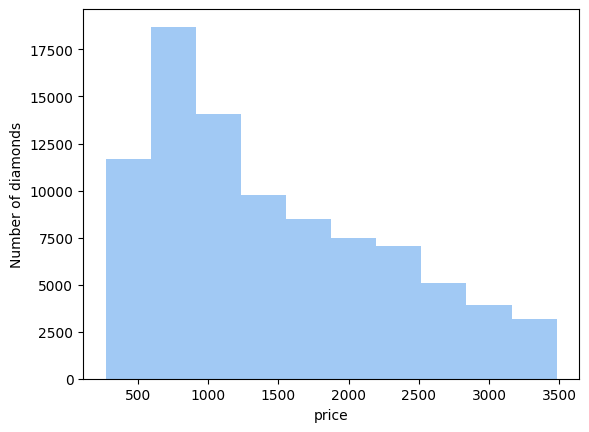

In [ ]:
plt.hist(majority_price)
plt.xlabel("price")
plt.ylabel("Number of diamonds") 
plt.show()

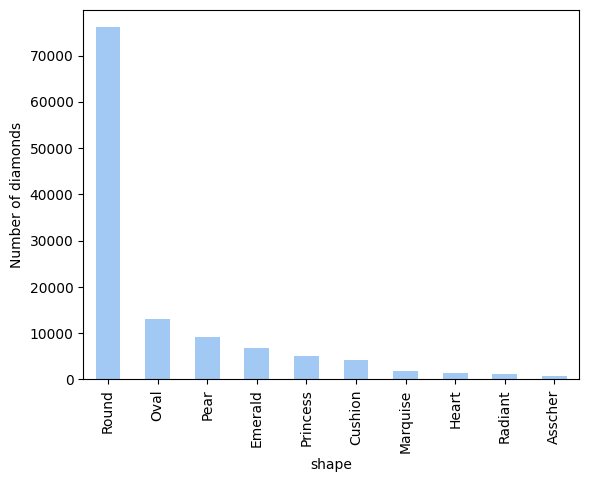

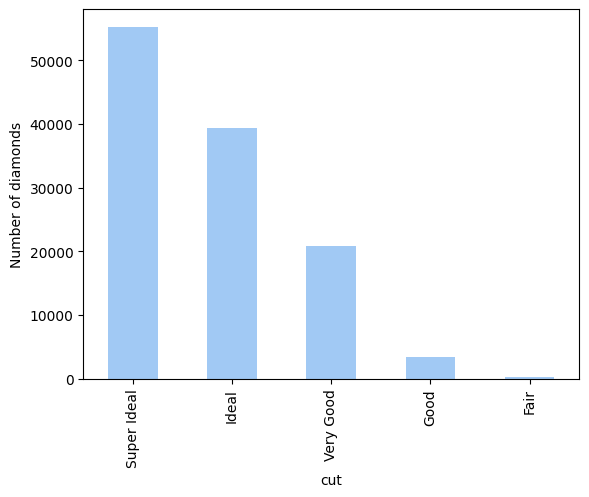

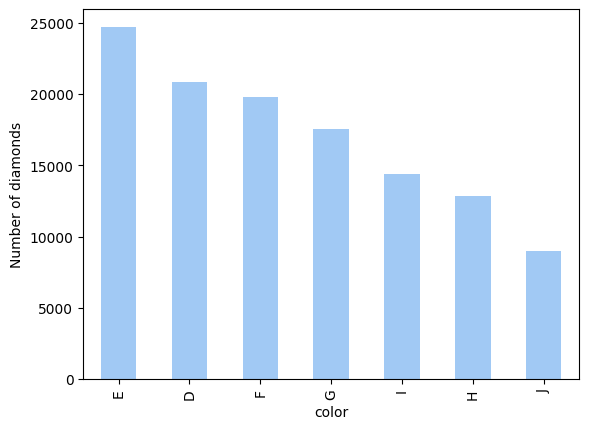

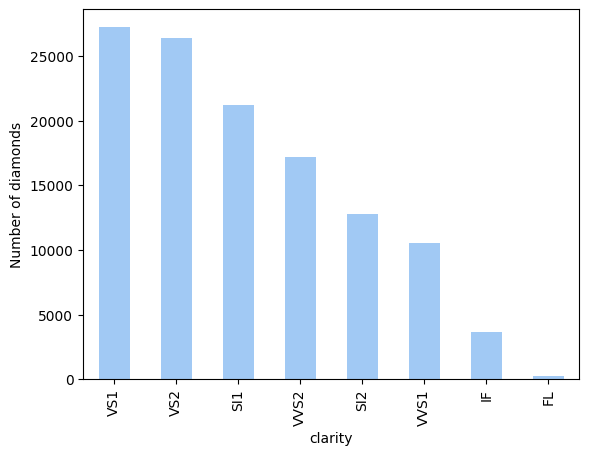

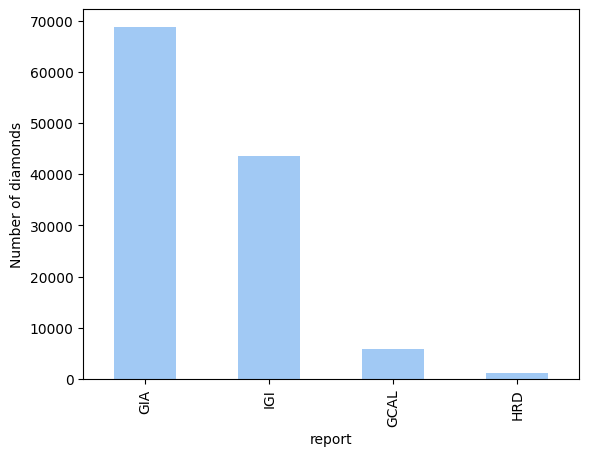

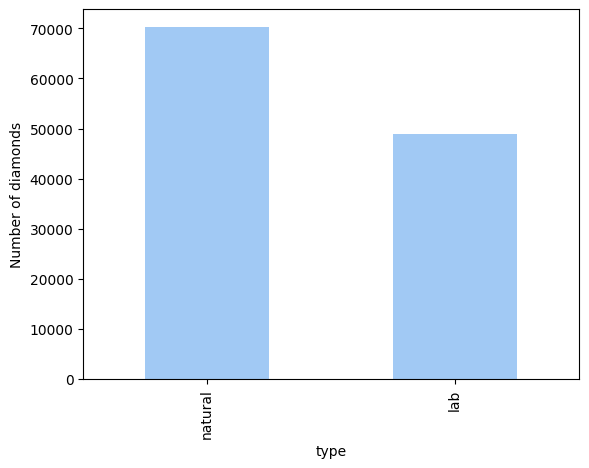

In [ ]:
#categorical features distribution
df["shape"].value_counts().plot(kind='bar')
plt.xlabel("shape")
plt.ylabel("Number of diamonds") 
plt.show()

df["cut"].value_counts().plot(kind='bar')
plt.xlabel("cut")
plt.ylabel("Number of diamonds") 
plt.show()

df["color"].value_counts().plot(kind='bar')
plt.xlabel("color")
plt.ylabel("Number of diamonds") 
plt.show()

df["clarity"].value_counts().plot(kind='bar')
plt.xlabel("clarity")
plt.ylabel("Number of diamonds") 
plt.show()

df["report"].value_counts().plot(kind='bar')
plt.xlabel("report")
plt.ylabel("Number of diamonds") 
plt.show()

df["type"].value_counts().plot(kind='bar')
plt.xlabel("type")
plt.ylabel("Number of diamonds") 
plt.show()


In [ ]:
# making temporary dataset subset with removed outliers and less values for better visualiations
# set seed
np.random.seed(100)

# removing outliers
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
subset_df = df[(df['price'] >= q1) & (df['price'] <= q3)]

# taking random sample for scatterplot
subset_df_scatter = subset_df.sample(n=1000)
subset_df_scatter.shape

#settign palette for seaborn visualisations
sns.set_palette("pastel")

Text(0, 0.5, 'price (USD)')

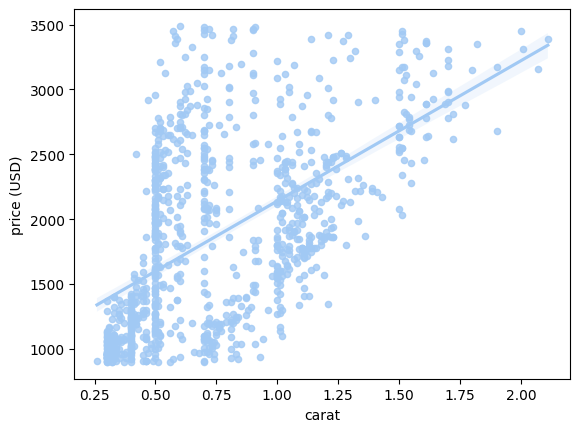

In [ ]:
# scatterplot of price vs carat

ax = sns.regplot(x=subset_df_scatter["carat"], y=subset_df_scatter["price"], scatter_kws={'s': 20})
ax.set_ylabel("price (USD)")

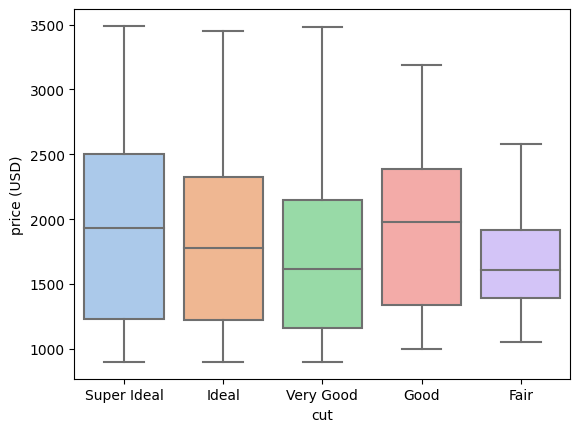

In [ ]:
# boxplot of price vs cut 
order_list = ["Super Ideal", "Ideal", "Very Good", "Good", "Fair"]
ax = sns.boxplot(x="cut", y="price", data=subset_df_scatter, order=order_list)
ax.set_ylabel("price (USD)")
plt.show()

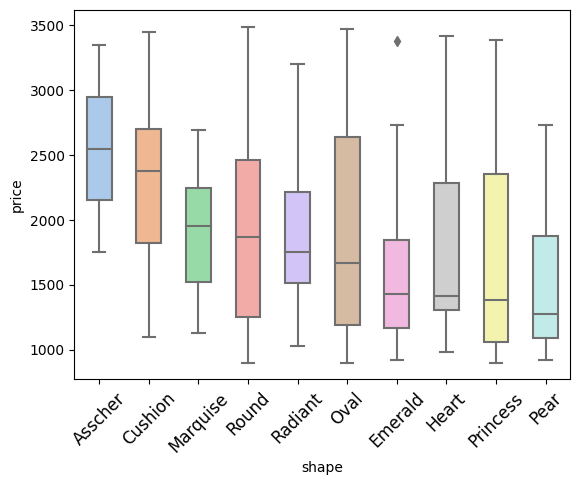

In [ ]:
# boxplot of price vs shape

# sort by median
diamonds_sorted = subset_df_scatter.groupby(['shape'])['price'].median().sort_values(ascending=False).index

sns.boxplot(x="shape", y="price", data=subset_df_scatter, order=diamonds_sorted, width=.5)
ax.set_ylabel("price (USD)")
plt.xticks(rotation=45, fontsize=12)
plt.show()

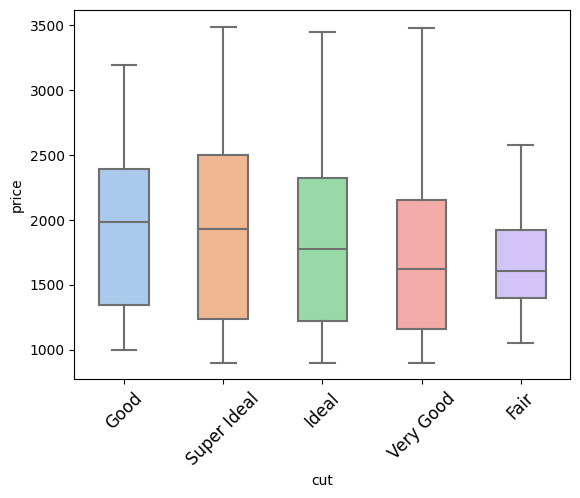

In [ ]:
# boxplot of price vs cut

# sort by median
diamonds_sorted = subset_df_scatter.groupby(['cut'])['price'].median().sort_values(ascending=False).index

sns.boxplot(x="cut", y="price", data=subset_df_scatter, order=diamonds_sorted, width=.5)
ax.set_ylabel("price (USD)")
plt.xticks(rotation=45, fontsize=12)
plt.show()

## **Preprocessing**

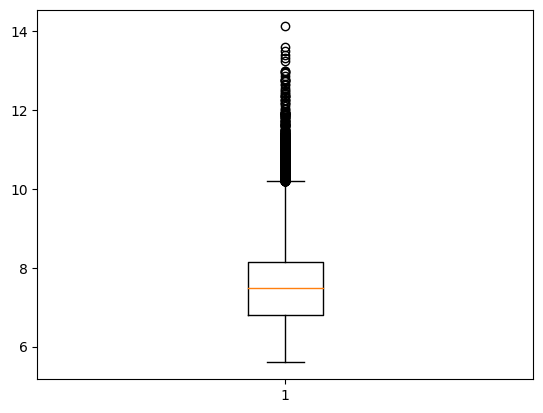

In [ ]:
df = pd.read_csv('diamonds_dataset.csv')
df = df.drop(columns=['url','id','date_fetched'])


df['shape'] = df['shape'].astype('category')
df['cut'] = df['cut'].astype('category')
df['color'] = df['color'].astype('category')
df['clarity'] = df['clarity'].astype('category')
encoder = TargetEncoder()
df['shape'] = encoder.fit_transform(df['shape'], df['price'])
df['cut'] = encoder.fit_transform(df['cut'], df['price'])
df['color'] = encoder.fit_transform(df['color'], df['price'])
df['clarity'] = encoder.fit_transform(df['clarity'], df['price'])

df = pd.get_dummies(df, columns = ['type', 'report'], drop_first = True)
y = df['price']
X = df.drop(columns=['price'])

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size = 0.2)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size = 0.25)
plt.boxplot(np.log(y))

X_train.to_csv("X_train.csv", index = False)
X_val.to_csv("X_val.csv", index = False)
X_test.to_csv("X_test.csv", index = False)
y_val.to_csv("y_val.csv", index = False)
y_train.to_csv("y_train.csv", index = False)
y_test.to_csv("y_test.csv", index = False)


## **Models**

### Linear Regression

Drop features: {'report_GIA'}
Index(['shape', 'price', 'carat', 'cut', 'color', 'clarity', 'type_natural',
       'report_HRD', 'report_IGI'],
      dtype='object')


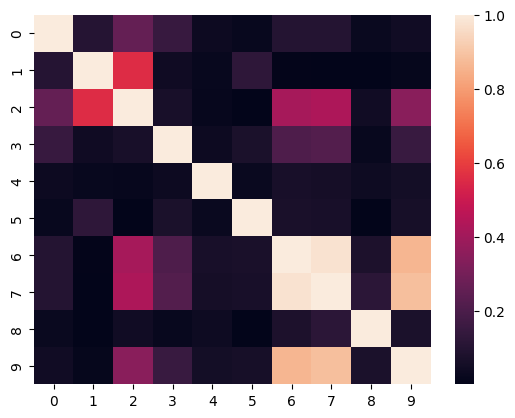

In [ ]:
# 1. Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >=0.9). 
#If yes, drop one from each pair of highly correlated features from the dataframe. 
lr_df=df
corr_matrix=lr_df.corr().abs().to_numpy()
features=lr_df.columns.values
drop=set()
sns.heatmap(corr_matrix);
for i in range(len(corr_matrix)):
   for j in range(len(corr_matrix)):
     if corr_matrix[i][j]>=0.9 and i>j:
        drop.add(features[i])

print("Drop features:",drop)
lr_df.drop(drop, axis=1, inplace=True)
# The result shows that we need to drop report_GIA
print(lr_df.columns)

In [ ]:
# 2. Standardize the columns in the feature matrices.
X_train_lr= X_train
X_val_lr = X_val
X_test_lr = X_test
y_train_lr = y_train
y_val_lr = y_val
y_test_lr = y_test

scaler = StandardScaler()
X_train_lr = scaler.fit_transform(X_train_lr)
X_val_lr = scaler.transform(X_val_lr)
X_test_lr = scaler.transform(X_test_lr)

# 3. Add a column of ones to the feature matrices for the bias term.
X_train_lr = np.hstack([np.ones((X_train_lr.shape[0], 1)), X_train_lr])
X_val_lr = np.hstack([np.ones((X_val_lr.shape[0], 1)), X_val_lr])
X_test_lr = np.hstack([np.ones((X_test_lr.shape[0], 1)), X_test_lr])
print(X_train_lr.shape)
print(y_train_lr.shape)

(71583, 10)
(71583,)


<ipython-input-92-f0e5632aa98a>:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  linear.fit(X_train_lr,y_train_lr)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.037e+12, tolerance: 6.579e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Linear Regression: 
Train MSE: 56899456.6018
Train MAE: 2114.2708
Train R-squared: 0.3809
 
Val MSE: 40755246.4486
Val MAE: 2120.4961
Val R-squared: 0.4060
 
Test MSE: 41102945.5650
Test MAE: 2085.2602
Test R-squared: 0.4214


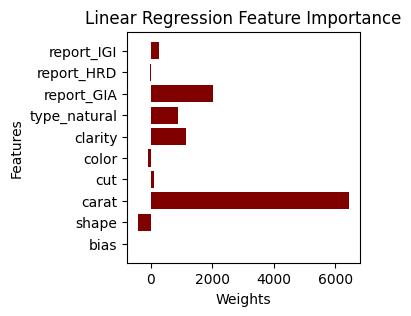

In [ ]:
# 4. Linear regression model
linear=Lasso(alpha=0)
linear.fit(X_train_lr,y_train_lr)

# Calculate MSE, MAE, and R-squared for train set
pred_y_train_lr=linear.predict(X_train_lr)
mse_train_lr = mean_squared_error(y_train_lr, pred_y_train_lr)
mae_train_lr = mean_absolute_error(y_train_lr, pred_y_train_lr)
r2_train_lr = r2_score(y_train_lr, pred_y_train_lr)

# Calculate MSE, MAE, and R-squared for val set
pred_y_val_lr=linear.predict(X_val_lr)
mse_val_lr = mean_squared_error(y_val_lr, pred_y_val_lr)
mae_val_lr = mean_absolute_error(y_val_lr, pred_y_val_lr)
r2_val_lr = r2_score(y_val_lr, pred_y_val_lr)

# Calculate MSE, MAE, and R-squared for test set
pred_y_test_lr=linear.predict(X_test_lr)
mse_test_lr = mean_squared_error(y_test_lr, pred_y_test_lr)
mae_test_lr = mean_absolute_error(y_test_lr, pred_y_test_lr)
r2_test_lr = r2_score(y_test_lr, pred_y_test_lr)

# Print results
print("Linear Regression: ")
print("Train MSE: {:.4f}".format(mse_train_lr) )
print("Train MAE: {:.4f}".format(mae_train_lr))
print("Train R-squared: {:.4f}".format(r2_train_lr))
print(" ")
print("Val MSE: {:.4f}".format(mse_val_lr) )
print("Val MAE: {:.4f}".format(mae_val_lr))
print("Val R-squared: {:.4f}".format(r2_val_lr))
print(" ")
print("Test MSE: {:.4f}".format(mse_test_lr))
print("Test MAE: {:.4f}".format(mae_test_lr))
print("Test R-squared: {:.4f}".format(r2_test_lr))

# Feature importance
features=['bias']+list(X.columns.values)
plt.figure(figsize=(3,3))
plt.barh(features, linear.coef_, color ='maroon')
 
plt.xlabel("Weights")
plt.ylabel("Features")
plt.title("Linear Regression Feature Importance")
plt.show()


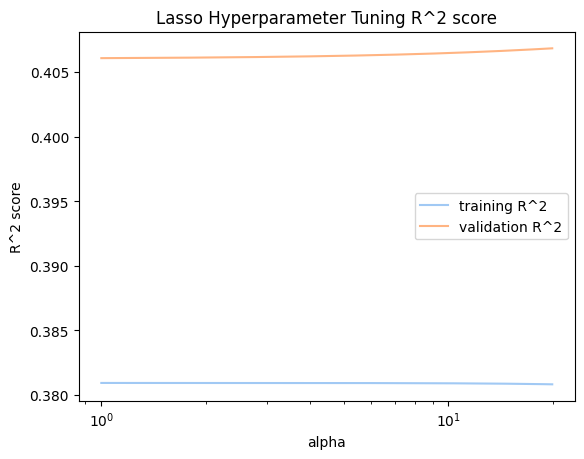

In [ ]:
# 6. Lasso
# Hyperparameter Tuning
from math import log2
alphas_ls = np.arange(1.0, 20.0, 0.1)
r2_train_ls=[]
r2_val_ls=[]
for a in alphas_ls:
  model=Lasso(alpha=a)
  model.fit(X_train_lr,y_train_lr)
  pred_y_train_cur=model.predict(X_train_lr)
  r2_train_cur=r2_score(y_train_lr, pred_y_train_cur)
  r2_train_ls.append(r2_train_cur)

  pred_y_val_cur=model.predict(X_val_lr)
  r2_val_cur=r2_score(y_val_lr, pred_y_val_cur)
  r2_val_ls.append(r2_val_cur)

plt.plot(alphas_ls, r2_train_ls, label = "training R^2")
plt.plot(alphas_ls, r2_val_ls, label = "validation R^2")
plt.xlabel("alpha")
plt.ylabel("R^2 score")
plt.xscale("log")
plt.title("Lasso Hyperparameter Tuning R^2 score")
plt.legend()
plt.show()


Best Lasso Model: 
Best Alpha:  1.0
Train MSE: 56899484.1629
Train MAE: 2113.1834
Train R-squared: 0.3809
 
Val MSE: 40751869.1526
Val MAE: 2119.3468
Val R-squared: 0.4061
 
Test MSE: 41100868.0173
Test MAE: 2084.1627
Test R-squared: 0.4214


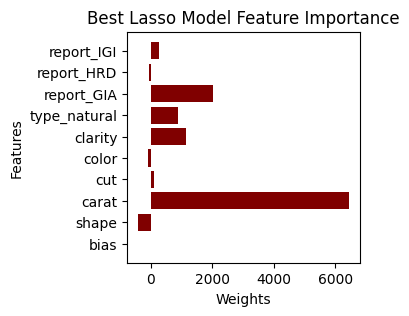

In [ ]:
# Best Lasso Model
best_alpha_index_ls=np.argmax(r2_val_ls)
best_alpha_ls=alphas_ls[best_alpha_index_ls]
best_lasso_model=Lasso(alpha=best_alpha_ls)
best_lasso_model.fit(X_train_lr,y_train_lr)

# Calculate MSE, MAE, and R-squared for train set
pred_y_train_ls=best_lasso_model.predict(X_train_lr)
mse_train_ls = mean_squared_error(y_train_lr, pred_y_train_ls)
mae_train_ls = mean_absolute_error(y_train_lr, pred_y_train_ls)
r2_train_ls = r2_score(y_train_lr, pred_y_train_ls)

# Calculate MSE, MAE, and R-squared for val set
pred_y_val_ls=best_lasso_model.predict(X_val_lr)
mse_val_ls = mean_squared_error(y_val_lr, pred_y_val_ls)
mae_val_ls = mean_absolute_error(y_val_lr, pred_y_val_ls)
r2_val_ls = r2_score(y_val_lr, pred_y_val_ls)

# Calculate MSE, MAE, and R-squared for test set
pred_y_test_ls=best_lasso_model.predict(X_test_lr)
mse_test_ls = mean_squared_error(y_test_lr, pred_y_test_ls)
mae_test_ls = mean_absolute_error(y_test_lr, pred_y_test_ls)
r2_test_ls = r2_score(y_test_lr, pred_y_test_ls)

# Print results
print("Best Lasso Model: ")
print("Best Alpha: ",best_alpha_ls)
print("Train MSE: {:.4f}".format(mse_train_ls) )
print("Train MAE: {:.4f}".format(mae_train_ls))
print("Train R-squared: {:.4f}".format(r2_train_ls))
print(" ")
print("Val MSE: {:.4f}".format(mse_val_ls))
print("Val MAE: {:.4f}".format(mae_val_ls))
print("Val R-squared: {:.4f}".format(r2_val_ls))
print(" ")
print("Test MSE: {:.4f}".format(mse_test_ls))
print("Test MAE: {:.4f}".format(mae_test_ls))
print("Test R-squared: {:.4f}".format(r2_test_ls))

# Feature importance

features=['bias']+list(X.columns.values)
plt.figure(figsize=(3,3))
plt.barh(features, best_lasso_model.coef_, color ='maroon')
 
plt.xlabel("Weights")
plt.ylabel("Features")
plt.title("Best Lasso Model Feature Importance")
plt.show()

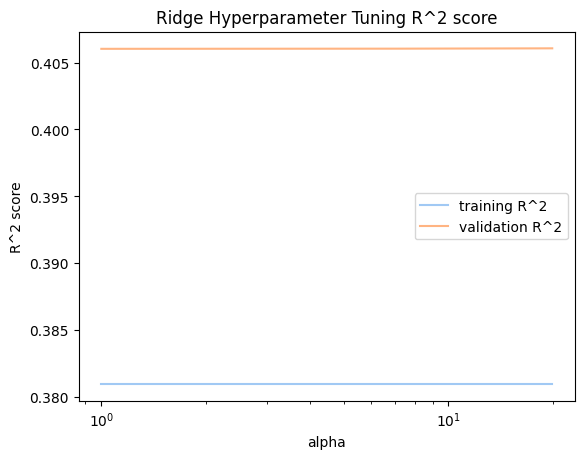

In [ ]:
# 7.Ridge
# Hyperparameter Tuning
from math import log2
alphas_rg = np.arange(1.0, 20.0, 0.1)
r2_train_rg=[]
r2_val_rg=[]
for a in alphas_rg:
  model=Ridge(alpha=a)
  model.fit(X_train_lr,y_train_lr)
  pred_y_train_cur=model.predict(X_train_lr)
  r2_train_cur=r2_score(y_train_lr, pred_y_train_cur)
  r2_train_rg.append(r2_train_cur)

  pred_y_val_cur=model.predict(X_val_lr)
  r2_val_cur=r2_score(y_val_lr, pred_y_val_cur)
  r2_val_rg.append(r2_val_cur)

plt.plot(alphas_rg, r2_train_rg, label = "training R^2")
plt.plot(alphas_rg, r2_val_rg, label = "validation R^2")
plt.xlabel("alpha")
plt.ylabel("R^2 score")
plt.xscale("log")
plt.title("Ridge Hyperparameter Tuning R^2 score")
plt.legend()
plt.show()


Best Ridge Model: 
Best Alpha:  1.0
Train MSE: 56899456.6285
Train MAE: 2114.2118
Train R-squared: 0.3809
 
Val MSE: 40755108.9194
Val MAE: 2120.4356
Val R-squared: 0.4060
 
Test MSE: 41102853.8926
Test MAE: 2085.2006
Test R-squared: 0.4214


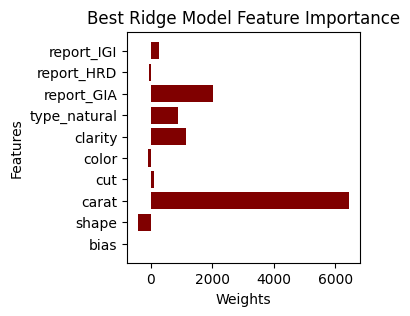

In [ ]:
# Best Ridge Model
best_alpha_index_rg=np.argmax(r2_val_rg)
best_alpha_rg=alphas_rg[best_alpha_index_rg]
best_ridge_model=Ridge(alpha=best_alpha_rg)
best_ridge_model.fit(X_train_lr,y_train_lr)

# Calculate MSE, MAE, and R-squared for train set
pred_y_train_rg=best_ridge_model.predict(X_train_lr)
mse_train_rg = mean_squared_error(y_train_lr, pred_y_train_rg)
mae_train_rg = mean_absolute_error(y_train_lr, pred_y_train_rg)
r2_train_rg = r2_score(y_train_lr, pred_y_train_rg)

# Calculate MSE, MAE, and R-squared for val set
pred_y_val_rg=best_ridge_model.predict(X_val_lr)
mse_val_rg = mean_squared_error(y_val_lr, pred_y_val_rg)
mae_val_rg = mean_absolute_error(y_val_lr, pred_y_val_rg)
r2_val_rg = r2_score(y_val_lr, pred_y_val_rg)

# Calculate MSE, MAE, and R-squared for test set
pred_y_test_rg=best_ridge_model.predict(X_test_lr)
mse_test_rg = mean_squared_error(y_test_lr, pred_y_test_rg)
mae_test_rg = mean_absolute_error(y_test_lr, pred_y_test_rg)
r2_test_rg = r2_score(y_test_lr, pred_y_test_rg)

# Print results
print("Best Ridge Model: ")
print("Best Alpha: ",best_alpha_rg)
print("Train MSE: {:.4f}".format(mse_train_rg) )
print("Train MAE: {:.4f}".format(mae_train_rg))
print("Train R-squared: {:.4f}".format(r2_train_rg))
print(" ")
print("Val MSE: {:.4f}".format(mse_val_rg))
print("Val MAE: {:.4f}".format(mae_val_rg))
print("Val R-squared: {:.4f}".format(r2_val_rg))
print(" ")
print("Test MSE: {:.4f}".format(mse_test_rg))
print("Test MAE: {:.4f}".format(mae_test_rg))
print("Test R-squared: {:.4f}".format(r2_test_rg))

# Feature importance

features=['bias']+list(X_lr.columns.values)
plt.figure(figsize=(3,3))
plt.barh(features, best_lasso_model.coef_, color ='maroon')
 
plt.xlabel("Weights")
plt.ylabel("Features")
plt.title("Best Ridge Model Feature Importance")
plt.show()

Simple LR:
Test MSE: 100826606.4939
Test MAE: 2128.6642
Test R-squared: 0.2878

Lasso:
Test MSE: 100886956.1369
Test MAE: 2109.5356
Test R-squared: 0.2874

Ridge:
Test MSE: 100829281.0626
Test MAE: 2127.5400
Test R-squared: 0.2878

### XGBoost

In [ ]:
# load in pre-processed data (this can be removed once we add the preprocessing steps to this notebook)

drive.mount('/content/drive/')
%cd /content/drive/MyDrive/AML-Spring-23-Group-20/Intro+dataset/

X_train =  pd.read_csv("X_train.csv")
X_val =  pd.read_csv("X_val.csv")
X_test =  pd.read_csv("X_test.csv")

y_train =  pd.read_csv("y_train.csv")
y_val =  pd.read_csv("y_val.csv")
y_test =  pd.read_csv("y_test.csv")

Mounted at /content/drive/
/content/drive/MyDrive/AML-Spring-23-Group-20/Intro+dataset


In [ ]:
# convert to NumPy arrays
X_train = X_train.to_numpy()
X_val = X_val.to_numpy()
X_test = X_test.to_numpy()

y_train = y_train.to_numpy().reshape(-1,)
y_val = y_val.to_numpy().reshape(-1,)
y_test = y_test.to_numpy().reshape(-1,)

In [ ]:
## 1. Create a vanilla XGBoost regressor

# Creating XGBRegressor object with hyperparameters
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=100)

# Fitting onto the train dataset
xgb.fit(X_train, y_train)

# Predicting y for the train,validation, and test set
y_train_pred = xgb.predict(X_train)
y_val_pred = xgb.predict(X_val)
y_test_pred = xgb.predict(X_test)

# Calculate MSE, MAE, and R-squared for train set
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate MSE, MAE, and R-squared for validation set
mse_val = mean_squared_error(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

# Calculate MSE, MAE, and R-squared for test set
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# print results 
print("Training set:")
print("MSE: {:.4f}".format(mse_train) )
print("MAE: {:.4f}".format(mae_train))
print("R-squared: {:.4f}".format(r2_train))

print("\nValidation set:")
print("MSE: {:.4f}".format(mse_val) )
print("MAE: {:.4f}".format(mae_val))
print("R-squared: {:.4f}".format(r2_val))

print("\nTest set:")
print("MSE: {:.4f}".format(mse_test))
print("MAE: {:.4f}".format(mae_test))
print("R-squared: {:.4f}".format(r2_test))

Training set:
MSE: 2670262.7347
MAE: 542.1248
R-squared: 0.9688

Validation set:
MSE: 8943109.7199
MAE: 621.8299
R-squared: 0.8928

Test set:
MSE: 23797647.4716
MAE: 613.4088
R-squared: 0.6825


In [ ]:
## 2. Parameter Tuning

#defining hyperparameters to test (For each hyperparmeter, give it 3 potential values)
param_grid = {'n_estimators': [100, 500, 1000],
              'learning_rate': [0.01, 0.1, 1.0],
              'max_depth': [3, 15, 30]}

# instantiate grid search object
grid = GridSearchCV(xgb, param_grid, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], cv=5, refit='neg_mean_squared_error')

# fitting grid search onto the developmental data & timing how long it takes
start = time.time()
grid.fit(X_val, y_val)
end = time.time()
mins = (end-start)/60

#print the time
print(f"Time taken to do model selection in minutes:{mins}")

#get best hyperparameters and score
best_params_xgb = grid.best_params_
best_estimator_xgb = grid.best_estimator_

#print
print(f"Best Parameters: {best_params_xgb}")
print(f"Best estimator: {best_estimator_xgb}")

Time taken to do model selection in minutes:46.77251532475154
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000}
Best estimator: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=100, ...)


In [ ]:
# fit model to X_train, y_train
best_estimator_xgb.fit(X_train, y_train)

# Predicting y for the train, validation, and test sets
y_train_pred = best_estimator_xgb.predict(X_train)
y_val_pred = best_estimator_xgb.predict(X_val)
y_test_pred = best_estimator_xgb.predict(X_test)

# Calculate MSE, MAE, and R-squared for train set
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate MSE, MAE, and R-squared for validation set
mse_val = mean_squared_error(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

# Calculate MSE, MAE, and R-squared for test set
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# print results 
print("Train set:")
print("MSE: {:.4f}".format(mse_train))
print("MAE: {:.4f}".format(mae_train))
print("R-squared: {:.4f}".format(r2_train))

print("\nValidation set:")
print("MSE: {:.4f}".format(mse_val))
print("MAE: {:.4f}".format(mae_val))
print("R-squared: {:.4f}".format(r2_val))

print("\nTest set:")
print("MSE: {:.4f}".format(mse_test))
print("MAE: {:.4f}".format(mae_test))
print("R-squared: {:.4f}".format(r2_test))

Train set:
MSE: 597538.1519
MAE: 309.9786
R-squared: 0.9930

Validation set:
MSE: 6551913.7153
MAE: 403.4668
R-squared: 0.9215

Test set:
MSE: 20306416.3826
MAE: 399.9521
R-squared: 0.7291


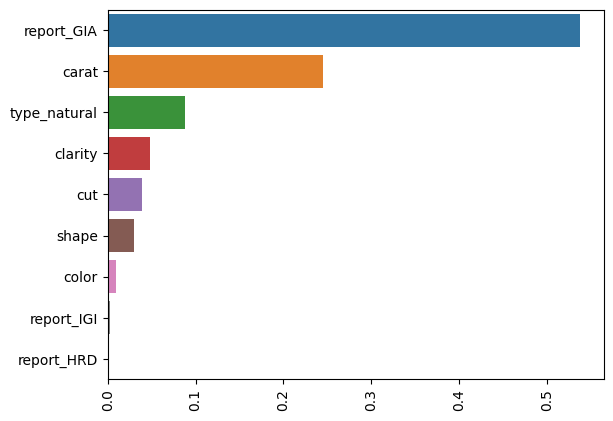

In [ ]:
# 3. Feature importance
X_train_df =  pd.read_csv("X_train.csv")

feature_names = X_train_df.columns

feat_imps = list(zip(feature_names, best_estimator_xgb.feature_importances_))
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] !=0, feat_imps)), key=lambda x: x[1], reverse= True)))
ax = sns.barplot(x=list(imps[:10]), y=list(feats[:10]))
ax.tick_params(axis='x', rotation=90)

### Random Forest

In [ ]:
# 1. Create a vanilla random forest regressor
rf = RandomForestRegressor(random_state=100, oob_score=True)

#fitting onto train datasest
rf.fit(X_train, y_train)

# Predicting y for the train,validation, and test set
y_train_pred = rf.predict(X_train)
y_val_pred = rf.predict(X_val)
y_test_pred = rf.predict(X_test)

# Calculate MSE, MAE, and R-squared for train set
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate MSE, MAE, and R-squared for validation set
mse_val = mean_squared_error(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

# Calculate MSE, MAE, and R-squared for test set
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# print results 
print("Training set:")
print("MSE: {:.4f}".format(mse_train) )
print("MAE: {:.4f}".format(mae_train))
print("R-squared: {:.4f}".format(r2_train))

print("\nValidation set:")
print("MSE: {:.4f}".format(mse_val) )
print("MAE: {:.4f}".format(mae_val))
print("R-squared: {:.4f}".format(r2_val))

print("\nTest set:")
print("MSE: {:.4f}".format(mse_test))
print("MAE: {:.4f}".format(mae_test))
print("R-squared: {:.4f}".format(r2_test))

Training set:
MSE: 3658245.4476
MAE: 164.1809
R-squared: 0.9573

Validation set:
MSE: 9312415.7338
MAE: 335.4607
R-squared: 0.8884

Test set:
MSE: 10022111.3250
MAE: 311.6392
R-squared: 0.8663


In [ ]:
# 2. Hyperparameter tuning

#defining the hyperparameters to test as explained in 2.4
param_grid = {'n_estimators': [100, 200, 300, 400, 500],
             'max_depth': [3, 5, 10, 20, 30]}

#instantiate grid search object
grid = GridSearchCV(rf, param_grid, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], cv=5, refit='neg_mean_squared_error')

#fitting grid search onto the developmental data & timing how long it takes
start = time.time()
grid.fit(X_val, y_val)
end = time.time()
mins = (end-start)/60

#print the time
print(f"Time taken to do model selection in minutes:{mins}")

#get best hyperparameters and estimators
best_params_rf = grid.best_params_
best_estimator_rf = grid.best_estimator_
oob_score = best_estimator_rf.oob_score_

#print
print(f"\nBest Parameters: {best_params_rf}")
print(f"Best estimator: {best_estimator_rf}")
print(f"Out-of-bag error: {oob_score:.4f}")



Time taken to do model selection in minutes:17.599601475397744

Best Parameters: {'max_depth': 30, 'n_estimators': 500}
Best estimator: RandomForestRegressor(max_depth=30, n_estimators=500, oob_score=True,
                      random_state=100)
Out-of-bag error: 0.7995


In [ ]:
#fit best estimator to X_dev, y_dev
best_estimator_rf.fit(X_train, y_train)

# Predicting y for the train, validation, and test sets
y_train_pred = best_estimator_rf.predict(X_train)
y_val_pred = best_estimator_rf.predict(X_val)
y_test_pred = best_estimator_rf.predict(X_test)

# Calculate MSE, MAE, and R-squared for train set
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate MSE, MAE, and R-squared for validation set
mse_val = mean_squared_error(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

# Calculate MSE, MAE, and R-squared for test set
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# print results 
print("Train set:")
print("MSE: {:.4f}".format(mse_train))
print("MAE: {:.4f}".format(mae_train))
print("R-squared: {:.4f}".format(r2_train))

print("\nValidation set:")
print("MSE: {:.4f}".format(mse_val))
print("MAE: {:.4f}".format(mae_val))
print("R-squared: {:.4f}".format(r2_val))

print("\nTest set:")
print("MSE: {:.4f}".format(mse_test))
print("MAE: {:.4f}".format(mae_test))
print("R-squared: {:.4f}".format(r2_test))

Train set:
MSE: 3202047.1446
MAE: 161.5172
R-squared: 0.9626

Validation set:
MSE: 8805786.5150
MAE: 333.2982
R-squared: 0.8945

Test set:
MSE: 9456153.2974
MAE: 309.0374
R-squared: 0.8738


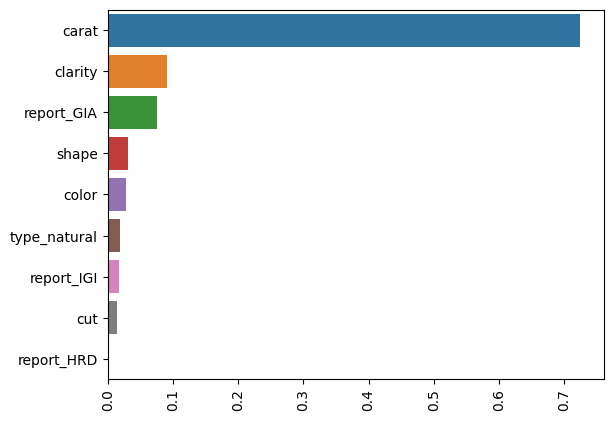

In [ ]:
# 3. Feature Importance

X_train_df =  pd.read_csv("X_train.csv")

feature_names = X_train_df.columns

feat_imps = list(zip(feature_names, best_estimator_rf.feature_importances_))
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] !=0, feat_imps)), key=lambda x: x[1], reverse= True)))
ax = sns.barplot(x=list(imps[:10]), y=list(feats[:10]))
ax.tick_params(axis='x', rotation=90)

### Neural Network

In [ ]:
!pip install tensorflow_addons
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow_addons.metrics import RSquare

from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline


num_feats = [
    c for c in X.columns if '_' not in c
]

preprocess = make_column_transformer(
    (StandardScaler(), num_feats),
    remainder='passthrough'
)

X_train = preprocess.fit_transform(X_train)
X_val = preprocess.fit_transform(X_val)
X_test = preprocess.fit_transform(X_test)

model = Sequential([
    Dense(32, input_shape=(9,), activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='relu'),
])

model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', RSquare()])
history = model.fit(
    X_train, y_train,
    epochs=100, batch_size=256,
    validation_data=(X_val, y_val),
)
eval_result = model.evaluate(X_test, y_test)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Epoch 1/100
280/280 [==============================] - 3s 6ms/step - loss: 117822624.0000 - mse: 117822624.0000 - mae: 3245.1597 - r_square: -0.0966 - val_loss: 51440640.0000 - val_mse: 51440640.0000 - val_mae: 2962.8025 - val_r_square: -0.1907
Epoch 2/100
280/280 [==============================] - 1s 5ms/step - loss: 107581080.0000 - mse: 107581080.0000 - mae: 2382.9270 - r_square: -0.0013 - val_loss: 37457236.0000 - val_mse: 37457236.0000 - val_mae: 2162.9583 - val_r_square: 0.1330
Epoch 3/100
280/280 [==============================] - 1s 5ms/step - loss: 95409288.0000 - mse: 95409288.0000 - mae: 2322.9680 - r_square: 0.1120 - val_loss: 31649078.0000 - val_mse: 31649078.0000 - val_mae: 2158.5640 - val_r_square: 0.2674
Epoch 4/100
280/280 [==============================] - 1s 5ms/step - loss: 87233472.0000 - mse: 87233472.0000 - mae: 2059.3721 - r_square: 0.1881 - val_loss: 25983074.0000

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                320       
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


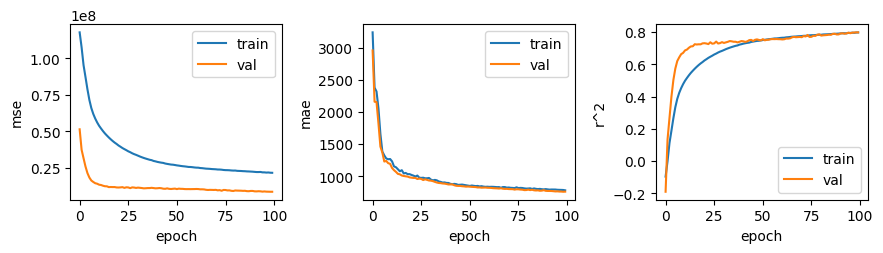

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.tight_layout()
fig.set_figheight(2)
fig.set_figwidth(9)

ax1.plot(history.history['mse'], label="train")
ax1.plot(history.history['val_mse'], label="val")
ax1.set_ylabel("mse")
ax1.set_xlabel("epoch")
ax1.legend()

ax2.plot(history.history['mae'], label="train")
ax2.plot(history.history['val_mae'], label="val")
ax2.set_ylabel("mae")
ax2.set_xlabel("epoch")
ax2.legend()

ax3.plot(history.history['r_square'], label="train")
ax3.plot(history.history['val_r_square'], label="val")
ax3.set_ylabel("r^2")
ax3.set_xlabel("epoch")
ax3.legend()

In [ ]:
print('Test Set Evaluation:')
print('MSE:', eval_result[1])
print('MAE:', eval_result[2])
print('R^2:', eval_result[3])

Test Set Evaluation:
MSE: 17047488.0
MAE: 785.52880859375
R^2: 0.6580790281295776
